# Ghoul, Goblin or Ghost?

In [62]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import random
import os

In [63]:
os.chdir(r'C:\Users\Jarrod\Documents\Data Science\Specialistinterne\ATO\Data Scientist Role')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training Data:\n",train.head())
print("\nNA values:\n", train.isna().all())
print("\nTesting Data:\n", test.head())
print("\nNA values:\n", test.isna().all())

Training Data:
    id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0   0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1   1     0.575560       0.425868     0.531401  0.439899  green  Goblin
2   2     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3   4     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4   5     0.566117       0.875862     0.418594  0.636438  green   Ghost

NA values:
 id               False
bone_length      False
rotting_flesh    False
hair_length      False
has_soul         False
color            False
type             False
dtype: bool

Testing Data:
    id  bone_length  rotting_flesh  hair_length  has_soul  color
0   3     0.471774       0.387937     0.706087  0.698537  black
1   6     0.427332       0.645024     0.565558  0.451462  white
2   9     0.549602       0.491931     0.660387  0.449809  black
3  10     0.638095       0.682867     0.471409  0.356924  white
4  13     0.361762       0.583

This is very clean data. Out in the real world, datasets can be very messy and contain a lot of missing values.

To add some empty values to the a copy of the training data, we can randomly take a sample of, say, 10% of each numeric column and replace this with NaN values. I have only been learning python for around six months and have not had to impute data but it appears scikit-learn provides the following: https://scikit-learn.org/stable/modules/impute.html

Below may be a possible way to predict what the missing data is 

In [64]:
from sklearn.impute import SimpleImputer
train_copy = train.copy()

#Randomly replace 150 values witn NaN
for x in range(40):
    y = random.randint(0, len(train))
    z = random.choice(list(train.columns))
    train_copy[z][y] = np.nan

print(train_copy.head())

imp = SimpleImputer(missing_values = np.nan, strategy='mean')
imp.fit(train_copy)

    id  bone_length  rotting_flesh  hair_length  has_soul  color    type
0  0.0     0.354512       0.350839     0.465761  0.781142  clear   Ghoul
1  1.0     0.575560       0.425868     0.531401  0.439899  green  Goblin
2  2.0     0.467875       0.354330     0.811616  0.791225  black   Ghoul
3  4.0     0.776652       0.508723     0.636766  0.884464  black   Ghoul
4  5.0     0.566117       0.875862     0.418594  0.636438  green   Ghost


C:\Users\Jarrod\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


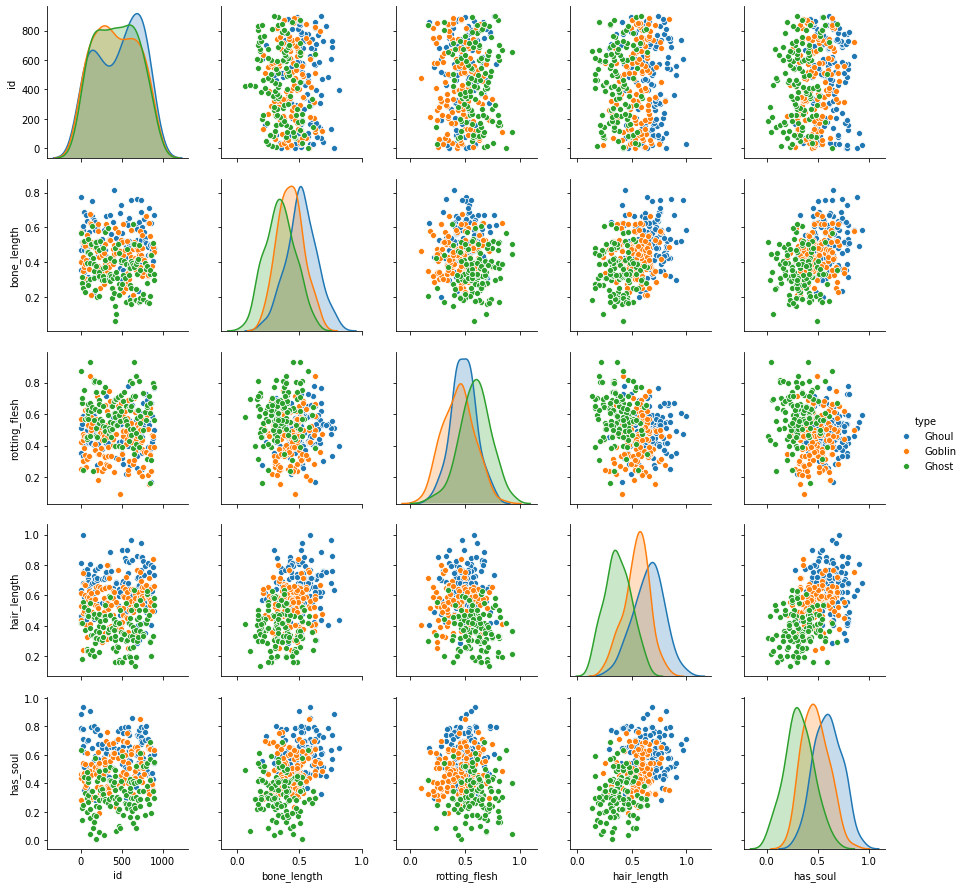

In [65]:
sns.pairplot(hue='type', diag_kind='kde', data=train)

In [66]:
#Transform categorical columns into integers
le = preprocessing.LabelEncoder()
test['color'] = le.fit_transform(test['color'])
train['color'] = le.fit_transform(train['color'])
train['type'] = le.fit_transform(train['type'])

In [67]:
#Split up dataset for testing and training
df=pd.get_dummies(train.drop(['type'],axis=1))
X_train,X_test,y_train,y_test=train_test_split(df,train['type'],random_state=0)

In [68]:
#Normalize data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [69]:
#KNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_norm, y_train)
preds = pd.Series(clf.predict(X_test_norm))
print('K-nearest neighbours accuracy:', round(accuracy_score(y_test, preds),2))

K-nearest neighbours accuracy: 0.44


In [70]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1000000,  max_iter=120000)
clf.fit(X_train_norm, y_train)
preds = pd.Series(clf.predict(X_test_norm))
print('Logistic Regression accuracy:', round(accuracy_score(y_test, preds)))

Logistic Regression accuracy: 1.0


It appears that logistic regression appears to be the best approach out of the two tested. Lets go ahead and with that. 

In [71]:
X_train =  test
result = pd.Series(clf.predict(normalize(X_train)), name = 'type')
result = le.inverse_transform(result)

#Transform into DataFrame
prediction = test.copy()
prediction['type'] = result

print(prediction.head())

   id  bone_length  rotting_flesh  hair_length  has_soul  color   type
0   3     0.471774       0.387937     0.706087  0.698537      0  Ghoul
1   6     0.427332       0.645024     0.565558  0.451462      5  Ghost
2   9     0.549602       0.491931     0.660387  0.449809      0  Ghoul
3  10     0.638095       0.682867     0.471409  0.356924      5  Ghost
4  13     0.361762       0.583997     0.377256  0.276364      0  Ghost


In [72]:
#Export Data to csv
prediction.to_csv('prediction.csv', index=False)